In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

# load the csv file

In [2]:
movies=pd.read_csv('tmdb-movies.csv')

# Exploring Data

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movies.shape

(10866, 21)

### we have 10866 rows and 21 columns

In [5]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Cleaning Data 

### removing the unused columns

In [6]:
movies=movies.drop(['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis=1)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   cast            10790 non-null  object
 4   director        10822 non-null  object
 5   tagline         8042 non-null   object
 6   runtime         10866 non-null  int64 
 7   genres          10843 non-null  object
 8   release_date    10866 non-null  object
 9   release_year    10866 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 849.0+ KB


### we removed vote_count as every film name has a specific count so we can not compare it to any thing 

# check duplicates

In [7]:
movies.duplicated().value_counts()

False    10865
True         1
dtype: int64

### so we have only one row duplicated

In [8]:
movies.drop_duplicates(keep ='first', inplace=True)

In [9]:
movies.duplicated().value_counts()

False    10865
dtype: int64

### so no duplicates now

### we have zero values in the revenue column so we have to take action with them according to their number 

In [10]:
movies[movies.revenue==0]["revenue"].count()

6016

### big number of zeros need to be removed 

In [11]:
movies=movies[(movies.revenue!=0)&(movies.budget!=0)]
movies.shape


(3854, 10)

### no zeros in budget and revenue

### checking the removal of zeros

In [12]:
movies[movies.revenue==0]["revenue"].count()

0

### removing nulls from revenue

In [13]:
movies.dropna(inplace=True,subset=["revenue"])

In [14]:
movies.isnull().sum()

budget              0
revenue             0
original_title      0
cast                4
director            1
tagline           280
runtime             0
genres              0
release_date        0
release_year        0
dtype: int64

In [15]:
movies.shape

(3854, 10)

### no nulls

### removing zeros from runtime to be efficient in visuals

In [16]:
movies["runtime"].replace('0', None)

0        124
1        120
2        119
3        136
4        137
        ... 
10822    131
10828    128
10829    120
10835    182
10848    100
Name: runtime, Length: 3854, dtype: int64

In [17]:
movies["runtime"].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### no zeros in runtime so it can be useful in analyzing

### changing date column to date format

In [18]:
movies["release_date"]=pd.to_datetime(movies["release_date"])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3854 non-null   int64         
 1   revenue         3854 non-null   int64         
 2   original_title  3854 non-null   object        
 3   cast            3850 non-null   object        
 4   director        3853 non-null   object        
 5   tagline         3574 non-null   object        
 6   runtime         3854 non-null   int64         
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 331.2+ KB


### checking index of first column

In [19]:
movies.iloc[0,0]

150000000

### first column is budget

### adding column of the total profit to analyze the data according to

In [20]:
movies.insert(2,"profit",movies["revenue"]-movies["budget"])
movies

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015
...,...,...,...,...,...,...,...,...,...,...,...
10822,7500000,33736689,26236689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,You are cordially invited to George and Martha...,131,Drama,2066-06-21,1966
10828,3000000,13000000,10000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,It tears you apart with suspense!,128,Mystery|Thriller,2066-07-13,1966
10829,4653000,6000000,1347000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,It's the Big One with the Big Two,120,Action|Western,2066-12-17,1966
10835,12000000,20000000,8000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,This is the heroic story of the men on the U.S...,182,Action|Adventure|Drama|War|Romance,2066-12-20,1966


# some insights

## 1- detecting the maximum and minimum profit with its data

### max_min function takes an argument (column) and returns the maximum and minimum  data values of this column

In [21]:
def max_min(col):
    maxi=pd.DataFrame(movies.loc[movies[col].idxmax()])
    mini=pd.DataFrame(movies.loc[movies[col].idxmin()])
    return maxi,mini
max_min("profit")

(                                                             1386
 budget                                                  237000000
 revenue                                                2781505847
 profit                                                 2544505847
 original_title                                             Avatar
 cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
 director                                            James Cameron
 tagline                               Enter the World of Pandora.
 runtime                                                       162
 genres                   Action|Adventure|Fantasy|Science Fiction
 release_date                                  2009-12-10 00:00:00
 release_year                                                 2009,
                                                              2244
 budget                                                  425000000
 revenue                                                  110

### film with maximum profit is Avatar
### film with minimum profit is The Warrior's Way

## 2- detecting the maximum and minimum budget with its data

In [22]:
max_min("budget")

(                                                             2244
 budget                                                  425000000
 revenue                                                  11087569
 profit                                                 -413912431
 original_title                                  The Warrior's Way
 cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
 director                                               Sngmoo Lee
 tagline                                   Assassin. Hero. Legend.
 runtime                                                       100
 genres                  Adventure|Fantasy|Action|Western|Thriller
 release_date                                  2010-12-02 00:00:00
 release_year                                                 2010,
                                                              2618
 budget                                                          1
 revenue                                                     

### film with maximum budget is The Warrior's Way
### film with minimum budget is Lost & Found

## 3- detecting the maximum and minimum revenue with its data

In [23]:
max_min("revenue")

(                                                             1386
 budget                                                  237000000
 revenue                                                2781505847
 profit                                                 2544505847
 original_title                                             Avatar
 cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
 director                                            James Cameron
 tagline                               Enter the World of Pandora.
 runtime                                                       162
 genres                   Action|Adventure|Fantasy|Science Fiction
 release_date                                  2009-12-10 00:00:00
 release_year                                                 2009,
                                                              5067
 budget                                                    6000000
 revenue                                                     

### film with maximum revenue is Avatar
### film with minimum revenue is Shattered Glass

## 4- year of release and profit

In [24]:
year_profit=movies.groupby("release_year")["profit"].sum()
year_profit

release_year
1960      108198052
1961      299083188
1962      166879846
1963      115411882
1964      294678387
1965      399281854
1966       52468689
1967      636334637
1968      168271762
1969      206862989
1970      454070023
1971      336284710
1972      457235917
1973     1057686099
1974      650582027
1975      808207270
1976      629426536
1977     1743308485
1978     1005100089
1979      950330150
1980     1002065664
1981     1320251458
1982     1811756359
1983     1505073842
1984     1833438131
1985     1666899046
1986     1665354869
1987     2148546726
1988     2313076703
1989     3603940908
1990     3454904971
1991     3048121485
1992     3873046070
1993     4575828325
1994     4704384415
1995     5608098320
1996     4736626727
1997     6380241248
1998     5274145395
1999     6433209130
2000     6110774823
2001     8022044875
2002     9004589344
2003     9202155213
2004     9822506642
2005     9259452998
2006     8726299999
2007    11686103667
2008    11843373159
2009   

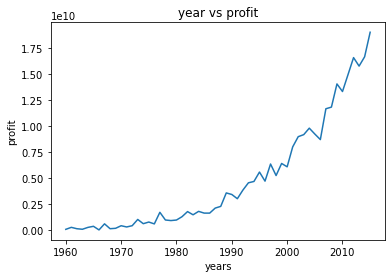

In [25]:
plt.plot(year_profit)
plt.xlabel('years')
plt.ylabel('profit')
plt.title('year vs profit')
plt.show()

### we found that the profit increases by years and 2015 is the year of maximum profit

## 5- now we are going to see the relationship between genres and profit

In [26]:
genres_profit_max=movies["genres"].value_counts().head(10)
genres_profit_max

Drama                   245
Comedy                  233
Drama|Romance           107
Comedy|Romance          104
Comedy|Drama|Romance     91
Comedy|Drama             88
Horror|Thriller          81
Horror                   58
Drama|Thriller           48
Action|Thriller          39
Name: genres, dtype: int64

### genres with max profit

Text(0.5, 1.0, 'genres vs max profit')

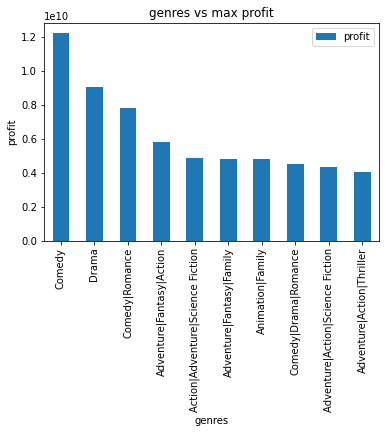

In [27]:
gen_prof = movies.groupby(['genres']).agg({'profit': 'sum'})
z=gen_prof.sort_values(by="profit",ascending=False).head(10)
z.plot(kind="bar")
plt.xlabel('genres')
plt.ylabel('profit')
plt.title('genres vs max profit')

### The genres that get maximum profit is comedy , drama and comedy|romance

### genres with min profit

Text(0.5, 1.0, 'genres vs min profit')

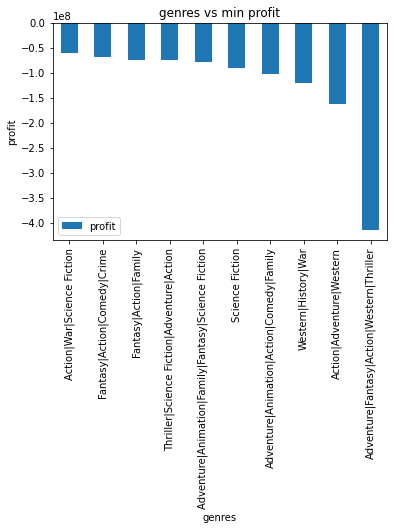

In [28]:
gen_prof = movies.groupby(['genres']).agg({'profit': 'sum'})
y=gen_prof.sort_values(by="profit",ascending=False).tail(10)
y.plot(kind="bar")
plt.xlabel('genres')
plt.ylabel('profit')
plt.title('genres vs min profit')

### The genres that get minimum profit is action|war|science fiction and fantacy|action|comedy|crime


# 6- runtime calculations and insights

In [29]:
movies["runtime"].mean()

109.22029060716139

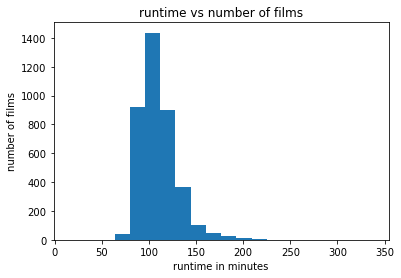

In [30]:
plt.hist(movies["runtime"],bins=20)
plt.xlabel('runtime in minutes')
plt.ylabel('number of films')
plt.title('runtime vs number of films')
plt.show()

### most movies runtime is around 100 minutes

Text(0.5, 1.0, 'profit vs runtime')

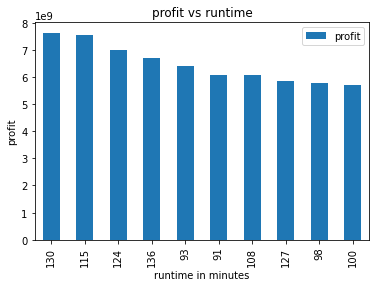

In [31]:
d=movies.groupby("runtime").agg({'profit': 'sum'})
d.sort_values(by="profit",ascending=False).head(10).plot(kind="bar")
plt.ylabel('profit')
plt.xlabel('runtime in minutes')
plt.title('profit vs runtime')

### films about 130 min has max profit

# conclusion
## to get a maximum profit the movie has to be in the following :
### 1- Average Budget must be around 60 millon dollar
### 2- Average duration of the movie must be 113 minutes
### 3- Genre must be : Comedy, Drama , comedy|romance
### 4- cast should has Sam Worthington, Zoe Saldana, Sigourney Weaver, James Cameron

# limitations
### I am not sure if the data is complete or not , budget and revenue columns do not have a currency and may be the movies are of different currencies which will affect our analysis , also removing rows of zeroes may affect the analysis since it was a big number of rows removed 
### some data has 1 and 2 values as budget which is not logic but w can not remove data any more 